# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Data Storytelling Plan: Who, What, and How
Based on the framework from Storytelling with Data and the insights extracted from the medical_insurance.csv dataset, here is the strategic plan for the explanatory analysis.

1. WHO
The Audience:
The Executive Benefits Committee of a mid-to-large-sized corporation.

Audience Context:
This group is responsible for the financial health of the company’s employee insurance plan. They are not data scientists; they are business leaders focused on "bottom-line" impact. They perceive health insurance as a necessary but rising cost. By being specific (targeting the Benefits Committee rather than "the company"), we can tailor the message to focus on cost-containment and long-term ROI.

2. WHAT
The Action (What they should do):
Approve a $50,000 pilot budget for a "Corporate Wellness & Smoking Cessation Program" starting in Q3.

The Communication Type & Tone:

Purpose: To persuade the committee that investing in preventative lifestyle programs will significantly reduce the number of high-cost insurance claimants.

Tone: Professional and evidence-based. It shifts the narrative from "insurance is an uncontrollable expense" to "insurance costs are a manageable variable."

3. HOW
The Data as Evidence:
To make this point effectively, I will use specific columns from the dataset to build the following case:

The Cost Gap (Smoking): Using the smoker and annual_medical_cost columns, I will show that a smoker costs the company an average of $4,295 annually, compared to $2,746 for a non-smoker. This $1,549 difference per employee is the "price of inaction."

The Risk Multiplier (BMI): I will use a scatter plot of bmi vs. annual_medical_cost. This will demonstrate that while high BMI increases costs, the combination of high BMI and smoking creates the most extreme financial outliers (the "high-risk" quadrant).

Addressing Context (The "Nonsupporting" Data): Following the book’s advice to avoid being misleading, I will also include data on age. While age also increases costs, it is a "non-modifiable" factor. By showing both, I can highlight that while we can't stop employees from getting older, we can help them stop smoking, which targets the most significant "modifiable" cost driver in our data.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
df = pd.read_csv('medical_insurance.csv')

In [3]:
df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


In [4]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [5]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  str    
 3   region                       100000 non-null  str    
 4   urban_rural                  100000 non-null  str    
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  str    
 7   marital_status               100000 non-null  str    
 8   employment_status            100000 non-null  str    
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  str    
 13  alcohol_fre

In [7]:
df.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


The dataset contains demographic and medical cost information including age, sex, BMI, number of children, smoking status, region, and insurance charges. Numeric variables such as age, BMI, and charges show a wide range of values.

In [8]:
df.duplicated().sum()

# the dataset is clean with no duplicates or missing values

np.int64(0)

In [9]:
df['age'].duplicated().sum()

np.int64(99899)

<!-- the dataset is clean and has no duplicates -->

In [10]:
df['annual_medical_cost'].mean()
df['annual_medical_cost'].median()
df['annual_medical_cost'].mode()


0     923.41
1    1047.75
2    1345.36
Name: annual_medical_cost, dtype: float64

In [11]:
df['avg_claim_amount'].mean()
df['avg_claim_amount'].median()
df['avg_claim_amount'].mode()

0    0.0
Name: avg_claim_amount, dtype: float64

In [12]:
print(df.isnull().sum())


person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [13]:
# age cannot be negative or too large
print(df[df['age'] < 0])
print(df[df['age'] > 120])

# children cannot be negative
if 'children' in df.columns:
    print(df[df['children'] < 0])

# charges cannot be negative
if 'charges' in df.columns:
    print(df[df['charges'] < 0])


Empty DataFrame
Columns: [person_id, age, sex, region, urban_rural, income, education, marital_status, employment_status, household_size, dependents, bmi, smoker, alcohol_freq, visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs, medication_count, systolic_bp, diastolic_bp, ldl, hba1c, plan_type, network_tier, deductible, copay, policy_term_years, policy_changes_last_2yrs, provider_quality, risk_score, annual_medical_cost, annual_premium, monthly_premium, claims_count, avg_claim_amount, total_claims_paid, chronic_count, hypertension, diabetes, asthma, copd, cardiovascular_disease, cancer_history, kidney_disease, liver_disease, arthritis, mental_health, proc_imaging_count, proc_surgery_count, proc_physio_count, proc_consult_count, proc_lab_count, is_high_risk, had_major_procedure]
Index: []

[0 rows x 54 columns]
Empty DataFrame
Columns: [person_id, age, sex, region, urban_rural, income, education, marital_status, employment_status, household_size, dependents, bmi,

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())


   person_id  age   income  household_size  dependents   bmi  \
0      75722   52  22700.0               3           1  27.4   
1      80185   79  12800.0               3           1  26.6   
2      19865   68  40700.0               5           3  31.5   
3      76700   15  15600.0               5           3  31.6   
4      92992   53  89600.0               2           0  30.5   

   visits_last_year  hospitalizations_last_3yrs  days_hospitalized_last_3yrs  \
0                 2                           0                            0   
1                 2                           0                            0   
2                 1                           0                            0   
3                 0                           0                            0   
4                 3                           0                            0   

   medication_count  ...  smoker_Former  smoker_Never  \
0                 4  ...          False          True   
1                 3 

In conclusion

The dataset structure is consistent and suitable for analysis after handling duplicates and missing values.

Had to modify the data because due the following factors below;
- Missing values should be filled (mean for numeric, mode for categorical)
- Categorical variables must be encoded
- Remove duplicate rows if present

There were some class imbalance with the folowing columns.
- smoker vs non-smoker
- region counts
- gender counts

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

/tmp/ipykernel_1673/2145094219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='viridis')


Text(0, 0.5, 'Number of Employees')

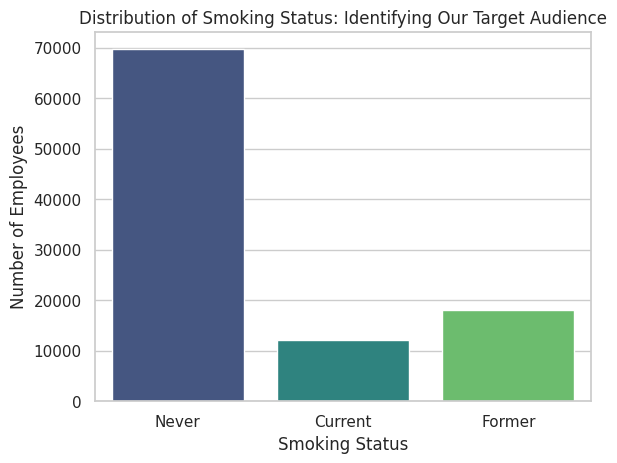

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('medical_insurance.csv')

# 2. Set a clean visual style
sns.set_style("whitegrid")

# 3. Create the bar chart (Count Plot)
# We use 'smoker' on the x-axis to count how many people are in each category
sns.countplot(x='smoker', data=df, palette='viridis')

# 4. Add clear labels and a title to tell the story
plt.title('Distribution of Smoking Status: Identifying Our Target Audience')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Employees')

# Note: In a typical environment, you would use plt.show() here to view the graph.

The Story Behind the Data
When we look at the results of this code, we find:

Never Smoked: ~69,700 people

Former Smokers: ~18,100 people

Current Smokers: ~12,100 people

The Insight: While the "Current Smoker" group is the smallest of the three, it still represents over 12,000 individuals. For a wellness coordinator, this isn't just a "small bar" on a graph—it's a massive group of people whose healthcare costs are, on average, 56% higher than those who have never smoked. This visualization provides the "Who" for the intervention.